In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [267]:
df = pd.read_csv(r'C:\Users\Anshal\Desktop\EDA Project\Bitcoin Data Analysis\bitcoin_price_Training - Training.csv')

In [268]:
df.head(4)

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"


In [269]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [270]:
df.shape

(1556, 7)

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [280]:
# Check the number of records
num_records = data.shape[0]
print(f"Total number of records: {num_records}")


Total number of records: 1556


In [272]:
df.describe()

,Open,High,Low,Close
count,1556.000000,1556.000000,1556.000000,1556.000000
mean,582.625328,597.992847,567.851446,584.239396
std,523.137312,542.992855,505.877401,525.904442
min,68.500000,74.560000,65.530000,68.430000
25%,254.287500,260.327500,248.835000,254.320000
50%,438.600000,447.560000,430.570000,438.855000
75%,662.437500,674.525000,646.735000,663.402500
max,2953.220000,2999.910000,2840.530000,2958.110000


In [273]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1556.0,582.625328,523.137312,68.50,254.2875,438.600,662.4375,2953.22
High,1556.0,597.992847,542.992855,74.56,260.3275,447.560,674.5250,2999.91
Low,1556.0,567.851446,505.877401,65.53,248.8350,430.570,646.7350,2840.53
Close,1556.0,584.239396,525.904442,68.43,254.3200,438.855,663.4025,2958.11


In [274]:
df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

In [275]:
df['Date'] = df['Date'].astype('datetime64[ns]')

##pd.to_datetime

In [276]:
df.dtypes

Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume                object
Market Cap            object
dtype: object

In [277]:
df['Date'].min()

Timestamp('2013-04-28 00:00:00')

In [278]:
df['Date'].max()

Timestamp('2017-07-31 00:00:00')

In [279]:
df['Date']

0      2017-07-31
1      2017-07-30
2      2017-07-29
3      2017-07-28
4      2017-07-27
          ...    
1551   2013-05-02
1552   2013-05-01
1553   2013-04-30
1554   2013-04-29
1555   2013-04-28
Name: Date, Length: 1556, dtype: datetime64[ns]

In [281]:
df.isnull().sum() ## Checked missing values or null values 

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [282]:
df.duplicated().sum() ##Checked the duplicated values 

0

In [283]:
# Highest and Lowest Closing Prices
highest_close = data['Close'].max()
lowest_close = data['Close'].min()
average_close = data['Close'].mean()
std_dev_close = data['Close'].std()

# Highest and Lowest High/Low Prices
highest_high = data['High'].max()
lowest_low = data['Low'].min()

print(f"Highest Closing Price: ${highest_close:.2f}")
print(f"Lowest Closing Price: ${lowest_close:.2f}")
print(f"Average Closing Price: ${average_close:.2f}")
print(f"Standard Deviation of Closing Price: ${std_dev_close:.2f}")
print(f"Highest Daily High Price: ${highest_high:.2f}")
print(f"Lowest Daily Low Price: ${lowest_low:.2f}")


Highest Closing Price: $2958.11
Lowest Closing Price: $68.43
Average Closing Price: $584.24
Standard Deviation of Closing Price: $525.90
Highest Daily High Price: $2999.91
Lowest Daily Low Price: $65.53


In [284]:
# Calculate Daily Percentage Change
data['Daily Change %'] = data['Close'].pct_change() * 100

# Find Max, Min, and Mean Daily Change
max_daily_change = data['Daily Change %'].max()
min_daily_change = data['Daily Change %'].min()
mean_daily_change = data['Daily Change %'].mean()

print(f"Maximum Daily Price Change: {max_daily_change:.2f}%")
print(f"Minimum Daily Price Change: {min_daily_change:.2f}%")
print(f"Mean Daily Price Change: {mean_daily_change:.2f}%")


Maximum Daily Price Change: 42.97%
Minimum Daily Price Change: -23.37%
Mean Daily Price Change: 0.29%


In [285]:
# Extract Year, Month, and Quarter
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Quarter'] = data.index.quarter

# Find the Year with the Highest Closing Price Growth
yearly_close = data.groupby('Year')['Close'].max()
highest_year = yearly_close.idxmax()

# Find the Quarter with the Highest Growth
quarterly_close = data.groupby(['Year', 'Quarter'])['Close'].max()
highest_quarter = quarterly_close.idxmax()

print(f"Highest Annual Closing Price Growth: {highest_year}")
print(f"Quarter with the Highest Price Growth: {highest_quarter}")


Highest Annual Closing Price Growth: 2017
Quarter with the Highest Price Growth: (2017, 2)


In [286]:
# Largest Difference in a Single Day
max_high_low_diff = (data['High'] - data['Low']).max()
max_close_open_diff = (data['Close'] - data['Open']).max()

print(f"Largest Difference (High - Low) in a Single Day: ${max_high_low_diff:.2f}")
print(f"Largest Difference (Close - Open) in a Single Day: ${max_close_open_diff:.2f}")


Largest Difference (High - Low) in a Single Day: $630.81
Largest Difference (Close - Open) in a Single Day: $547.71


In [287]:
type(df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [288]:
df.head(3)

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


In [289]:
df.tail(5)

,Date,Open,High,Low,Close,Volume,Market Cap
1551,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
1552,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"


In [290]:
df.sort_index(ascending = False)

,Date,Open,High,Low,Close,Volume,Market Cap
1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
1552,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
1551,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...,...
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"


In [291]:
data = df.sort_index(ascending = False).reset_index()

In [292]:
data

,index,Date,Open,High,Low,Close,Volume,Market Cap
0,1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
3,1552,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
4,1551,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...,...,...
1551,4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
1552,3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
1553,2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
1554,1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"


In [293]:
# Drops the 'index' column from the DataFrame along axis 1 (columns) and modifies the DataFrame in place
data.drop('index', axis=1, inplace=True)


In [294]:
data

,Date,Open,High,Low,Close,Volume,Market Cap
0,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
3,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
4,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...,...
1551,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
1552,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
1553,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
1554,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"


In [295]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

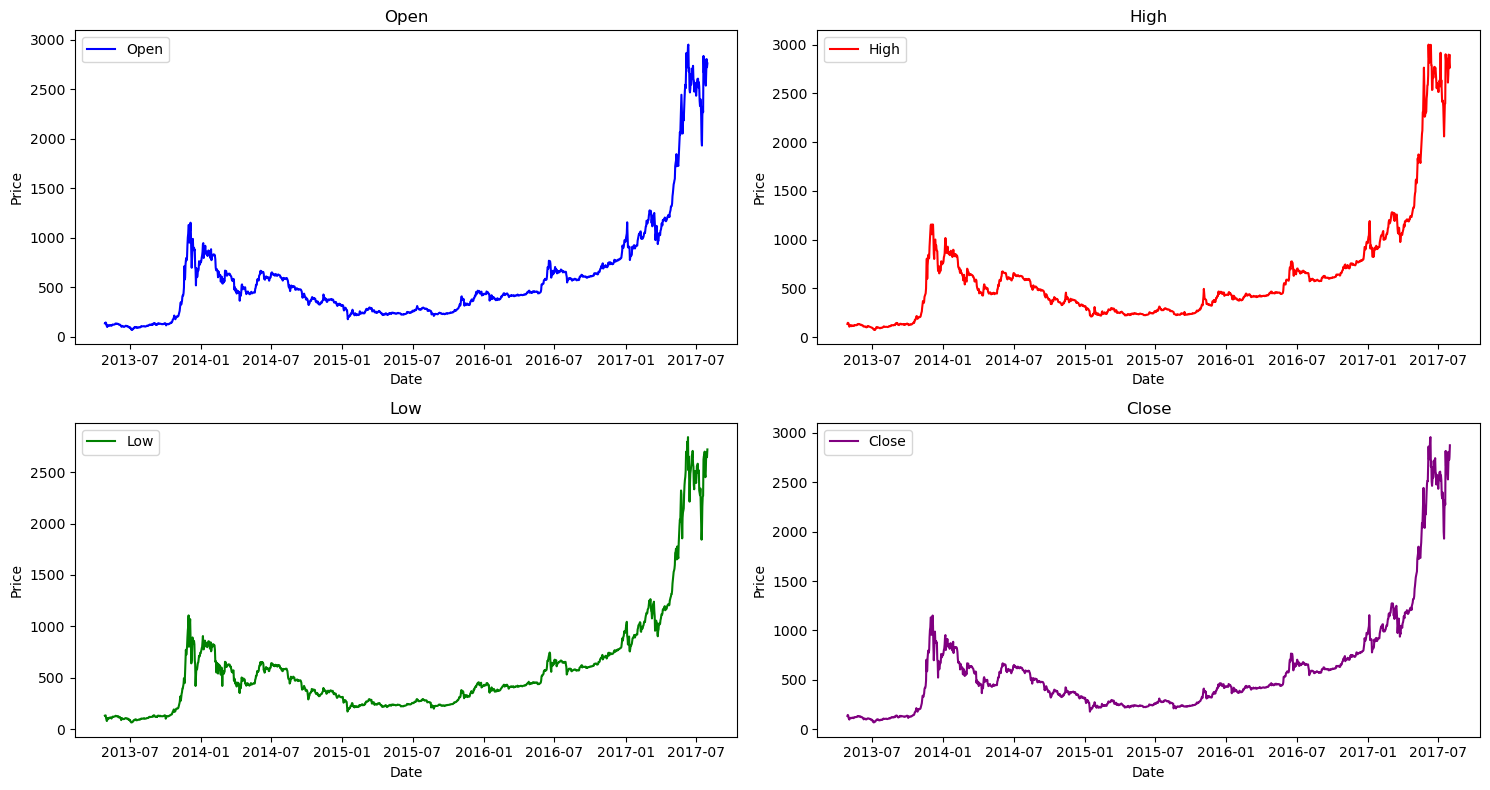

In [296]:
plt.figure(figsize = (15,8))

colors = ['blue', 'red', 'green', 'purple']

for index, col in enumerate(['Open', 'High', 'Low', 'Close'], 1):
    plt.subplot(2, 2, index)
    plt.plot(df['Date'], df[col], color=colors[index-1], label=col)  # Different colors
    plt.title(col)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()  # Show legend for clarity

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

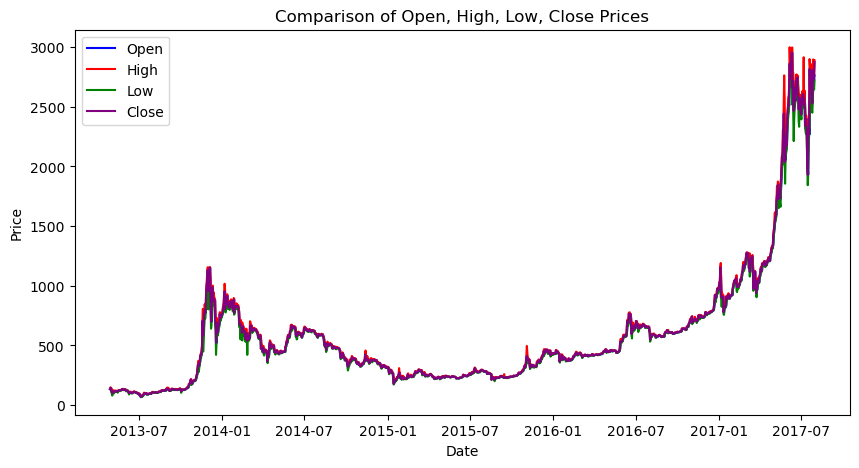

In [297]:
plt.figure(figsize=(10, 5))

plt.plot(df['Date'], df['Open'], label='Open', color='blue')
plt.plot(df['Date'], df['High'], label='High', color='red')
plt.plot(df['Date'], df['Low'], label='Low', color='green')
plt.plot(df['Date'], df['Close'], label='Close', color='purple')

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.title('Comparison of Open, High, Low, Close Prices')
plt.show()

In [298]:
df['Open-High Diff'] = df['High'] - df['Open']
df['High-Low Diff'] = df['High'] - df['Low']
df['Close-Open Diff'] = df['Close'] - df['Open']

print(df[['Open-High Diff', 'High-Low Diff', 'Close-Open Diff']].describe())


       Open-High Diff  High-Low Diff  Close-Open Diff
count     1556.000000    1556.000000      1556.000000
mean        15.367519      30.141401         1.614068
std         34.807692      53.382173        37.091013
min          0.000000       0.000000      -293.590000
25%          1.480000       5.750000        -4.010000
50%          4.615000      11.925000         0.670000
75%         13.480000      29.117500         6.660000
max        630.810000     630.810000       547.710000


##  Final Conclusion:
subplots are correct—they look similar because the values are close.
The comparison plot (overlaying all four) is also valid.

In [299]:
## Analysing open high low close value of Bitcoin 

In [300]:
data.shape

(1556, 7)

In [301]:
bitcoin_sample = data[0:50]   ## selecting the first 50 rows

In [302]:
!pip install chart_studio
!pip install plotly

In [303]:
import chart_studio.plotly as py

import plotly.graph_objects as go 

import plotly.express as px

from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot
init_notebook_mode(connected=True)

In [304]:
init_notebook_mode(connected = True)

In [305]:
trace = go.Candlestick(x = bitcoin_sample['Date'],
              high = bitcoin_sample['High'],
              open = bitcoin_sample['Open'],
              close = bitcoin_sample['Close'],
              low = bitcoin_sample['Low'])

In [306]:
candle_data = [trace]

layout = {
    'title': 'Bitcoin Historical Price',
    'xaxis': {'title': 'Date'},  # xaxis should be a dictionary with a 'title' key
    'yaxis': {'title': 'Price'}  # Optional: Adding a y-axis title for clarity
}


In [307]:
go.Figure(data = candle_data)

In [308]:
fig = go.Figure(data = candle_data)

fig.update_layout(xaxis_rangeslider_visible = False)
fig.show()

## Analysing closing price 

In [309]:
data['Close']

0        134.21
1        144.54
2        139.00
3        116.99
4        105.21
         ...   
1551    2671.78
1552    2809.01
1553    2726.45
1554    2757.18
1555    2875.34
Name: Close, Length: 1556, dtype: float64

<Axes: >

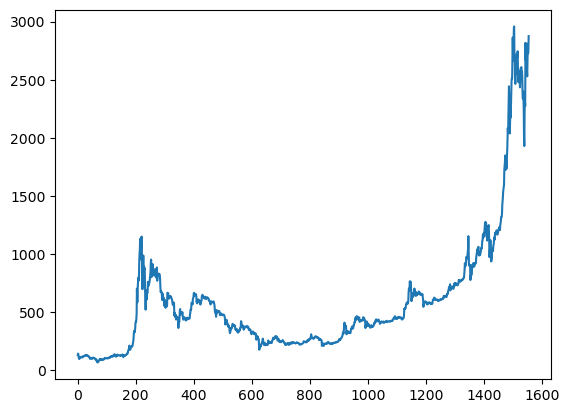

In [310]:
data['Close'].plot()

In [311]:
data.set_index('Date',inplace=True)

In [312]:
data

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


<Axes: xlabel='Date'>

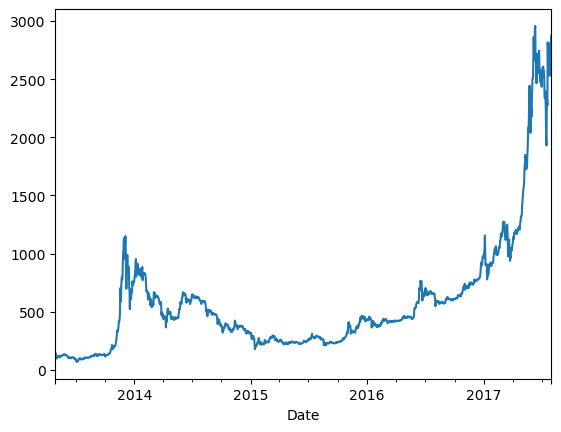

In [313]:
data['Close'].plot()


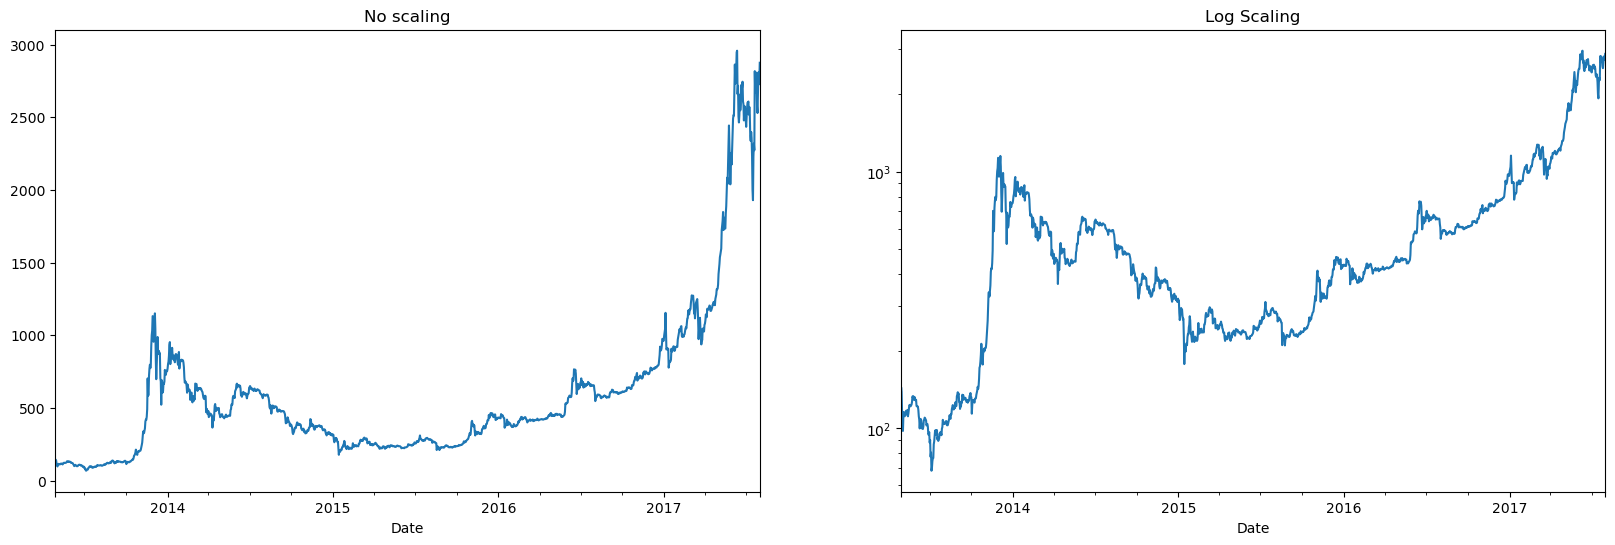

In [314]:
plt.figure(figsize = (20,6))

plt.subplot(1,2,1)
data['Close'].plot()
plt.title('No scaling')

plt.subplot(1,2,2)
data['Close'].plot()
plt.title('Log Scaling')
plt.yscale('log')

## Analyse closing price on Yearly , Quaterly , Monthly Basis 

In [315]:
data.head(4)

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"


<Axes: xlabel='Date'>

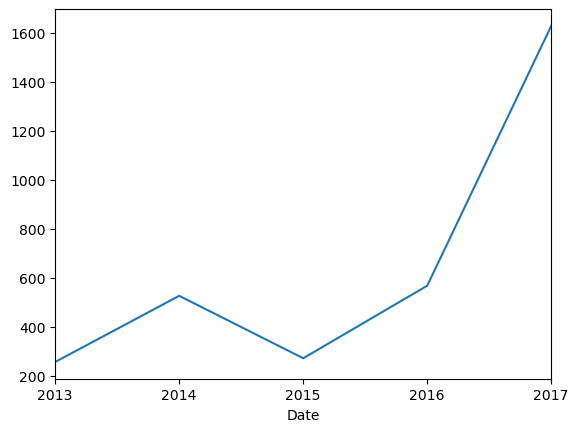

In [316]:
data['Close'].resample('Y').mean().plot()

<Axes: xlabel='Date'>

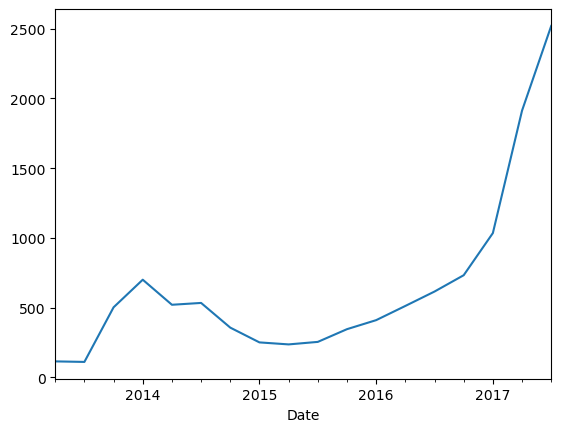

In [317]:
data['Close'].resample('Q').mean().plot()

<Axes: xlabel='Date'>

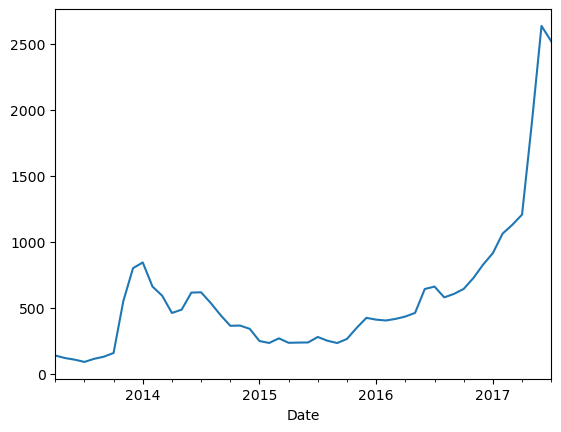

In [318]:
data['Close'].resample('M').mean().plot()


# Analysing Daily Change in Closing price of the stock

In [319]:
data['Close_price_pct_change'] = data['Close'].pct_change() * 100

In [320]:
data['Close_price_pct_change']

Date
2013-04-28          NaN
2013-04-29     7.696893
2013-04-30    -3.832849
2013-05-01   -15.834532
2013-05-02   -10.069237
                ...    
2017-07-27     5.626915
2017-07-28     5.136276
2017-07-29    -2.939114
2017-07-30     1.127107
2017-07-31     4.285538
Name: Close_price_pct_change, Length: 1556, dtype: float64

<Axes: xlabel='Date'>

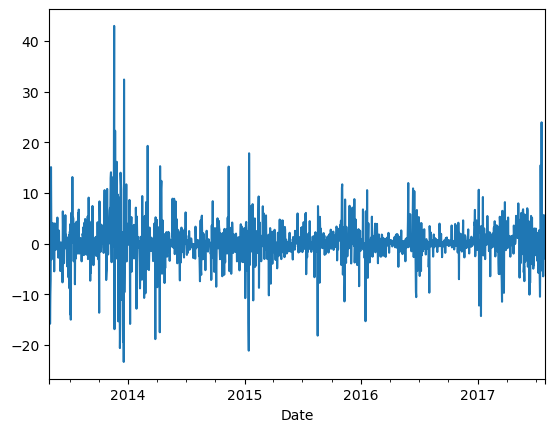

In [321]:
data['Close_price_pct_change'].plot()